In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from gensim.models import Word2Vec, KeyedVectors
from gensim.models.word2vec import Text8Corpus
from sklearn.decomposition import PCA

In [2]:
corpus = Text8Corpus('./ja.text8')
model_text8 = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=1, workers=4)

In [3]:
word = "東京"
vector = model_text8.wv[word]
print(f"Word vector for '{word}':\n{vector}")

word1 = "東京"
word2 = "神奈川" 
similarity = model_text8.wv.similarity(word1, word2)
print(f"Word similarity for '{word1} and {word2}':\n{similarity}")

similar_words = model_text8.wv.most_similar(word, topn=10)
print(f"Top 10 words similar to '{word}':")
for similar_word, similarity in similar_words:
  print(f"{similar_word}: {similarity}")

Word vector for '東京':
[-1.7626293   0.3473791  -1.2913884   1.0971981  -3.0269785   1.1491405
  3.0872867   1.130217   -5.241323    2.4267926  -5.390852    2.1171856
 -2.0863285  -1.3401679  -1.9299613   3.673134   -1.1523273   0.1733946
 -1.1850747   0.18484372 -4.731578    3.3687918   2.681993    0.7363681
 -0.2083243   0.4171471   0.9114497   2.1063406  -1.6291758  -0.44164994
  1.1738119  -0.6825259  -1.9171793  -0.41287097  0.49078315 -1.3311216
  0.21997929  3.0855951  -1.1634398  -0.32540625 -0.30820322  0.48128122
  4.059737    0.16555576 -0.57147205 -0.03778716  0.9062206  -1.475838
 -0.00973988 -0.6498704  -0.7436186  -3.226577   -0.8519308   0.00995718
 -1.9687849  -0.2548174   4.024753    1.029643    2.241596    0.4295337
  2.3999684   0.9762789   0.1532367  -1.3138977   0.36593622  1.7848412
 -1.3568761   3.2860165   2.0424848  -1.9958163   1.7672186   2.6217093
  0.7834775   0.74802417  1.668824    0.615111   -3.5029266   2.0149019
  1.9410257  -1.6359028   2.3401656   1.

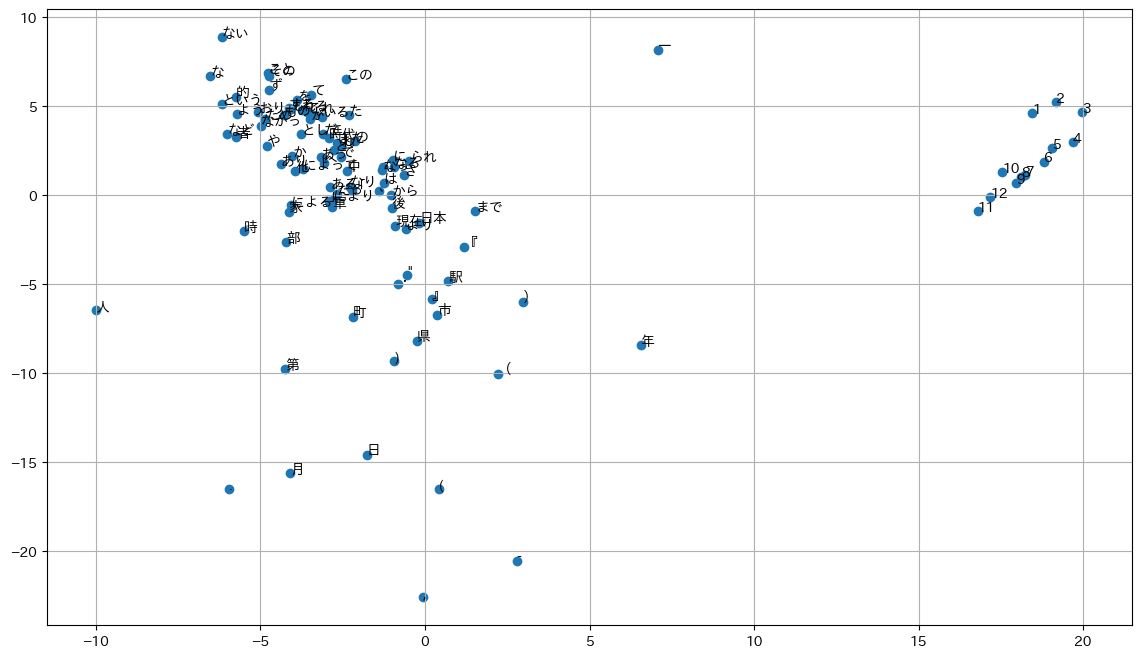

In [4]:
words = list(model_text8.wv.index_to_key)[:100]

word_vectors = []
for word in words:
  word_vectors.append(model_text8.wv[word])  

pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

plt.figure(figsize=(14, 8))
plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
  plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.grid()
plt.show()

In [5]:
model_chive = KeyedVectors.load("./chive-1.3-mc90.kv")

In [6]:
word = "東京"
vector = model_chive[word]
print(f"Word vector for '{word}':\n{vector}")

word1 = "東京"
word2 = "神奈川"
similarity = model_chive.similarity(word1, word2)
print(f"Word similarity for '{word1} and {word2}':\n{similarity}")

similar_words = model_chive.most_similar(word, topn=10)
print(f"Top 10 words similar to '{word}':")
for similar_word, similarity in similar_words:
  print(f"{similar_word}: {similarity}")

Word vector for '東京':
[ 0.0344494   0.30866903  0.39025226  0.05224727 -0.04730398  0.09166868
  0.09877509 -0.25373158 -0.06944488  0.2863468   0.14062947 -0.01888627
  0.14472397  0.03196093 -0.11655973  0.21705034  0.09880491 -0.02026572
 -0.1465599  -0.21050113  0.08284777  0.08148597 -0.1326505  -0.11843117
 -0.00492783 -0.30604738  0.08206327  0.11414479  0.04534557 -0.1160261
  0.0781585   0.15522158  0.13503695  0.04953204  0.03076172  0.00122027
 -0.07628236 -0.19826968  0.2717369  -0.15610118 -0.27554536  0.03423405
 -0.04879209  0.36025962 -0.03428946 -0.36916366  0.02389197  0.02183556
  0.06597114 -0.20657061 -0.11822502  0.03434118 -0.10610773 -0.03933438
 -0.02211881 -0.28380984 -0.37322953  0.11516481 -0.07852454 -0.08405983
  0.16950038 -0.26074594  0.13201687  0.04341868 -0.07084348 -0.08061425
 -0.01534502 -0.05774179  0.04312001  0.06656778 -0.13865748 -0.04452733
  0.36440322 -0.234105   -0.2363982  -0.03267636 -0.2940757   0.11717491
  0.02147578 -0.23400126  0.04

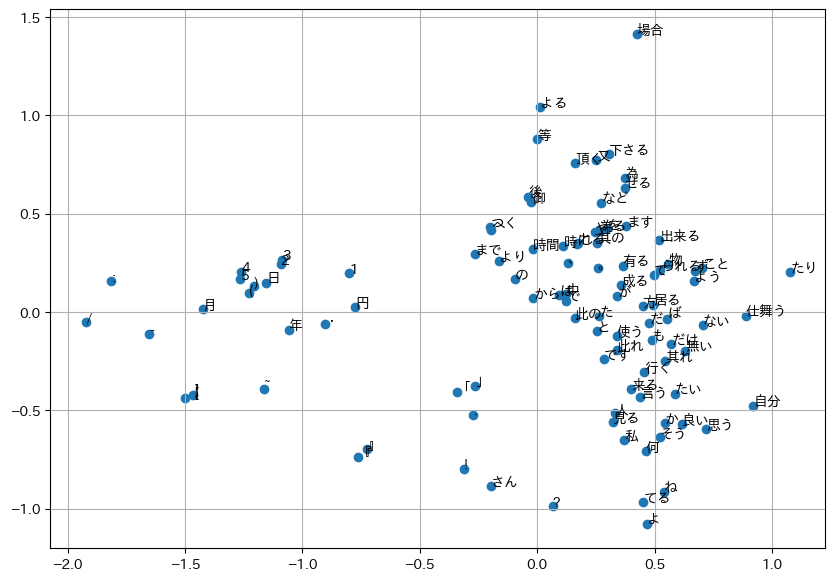

In [7]:
words = list(model_chive.index_to_key)[:100]

word_vectors = []
for word in words:
  word_vectors.append(np.array(model_chive[word]))

pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 7))
plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
  plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.grid()
plt.show()